In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt, pi
%matplotlib inline

В качестве исследуемого распределения я выбрал **распределение Рэлея** (ссылки на [wiki](https://en.wikipedia.org/wiki/Rayleigh_distribution), [scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_rayleigh.html)).
Формула распределения:

$$f(x,\sigma) = {x\over\ \sigma^2}exp(-{x^2\over\ 2\sigma^2}),  x\geq0, \sigma>0$$

Сгенерируем выборку из 1000 образцов и построим гистограмму распределения выборки и график теоретического распределения функции. Зададим начальный параметр распределения (сигма) равным 1,5: $\sigma = 1.5$.

In [2]:
sigma = 1.5
ray = sts.rayleigh(scale=sigma)
sample = ray.rvs(size=1000)

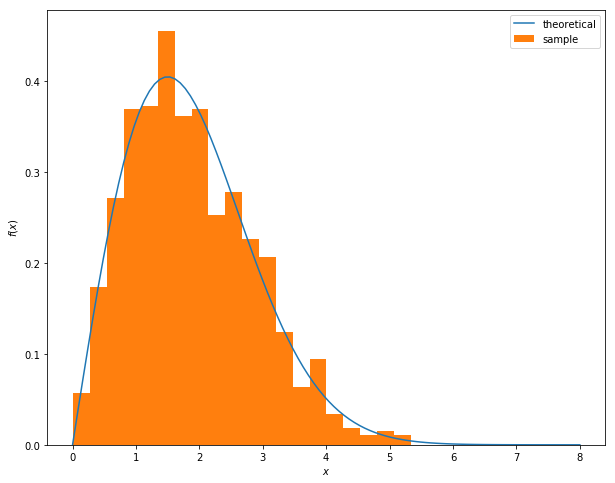

In [3]:
x = np.linspace(0,8,100)
pdf = ray.pdf(x)
plt.figure(figsize=(10, 8))
plt.plot(x, pdf, label = 'theoretical')
plt.hist(sample, bins=20, normed=True, label = 'sample')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Посчитаем теоретические значения математического ожидания и дисперсии для нашего распеределения. А затем сравним их с получащимися из ЦПТ по выборкам. Согласно википедии теоретическое среднее и дисперсия распределения Рэлея вычисляется по следующей формуле:

$$\mu = \sigma\sqrt{\frac{\pi}{2}}$$
$$var = (2-\pi/2)\sigma^2$$

In [4]:
MU = sigma*sqrt(pi/2)
var = (2-pi/2)*sigma**2
print(u'Теоретическое среднее распределения Рэлея:', round(MU, 2))
print(u'Теоретическая дисперсия распределения Рэлея', round(var, 2))

Теоретическое среднее распределения Рэлея: 1.88
Теоретическая дисперсия распределения Рэлея 0.97


Напишем функцию, которая на базе информации о размере выборке рассчитает среднее каждой выборки, а затем построит гистограмму распределения средних. А также выведет рассчитанное по выборке приближенное значение среднего и стандартного отклонения

In [5]:
def gen_subs(sample,sub_size):
    mns = []
    #Формируем 1000 выборок по sub_size элементов в каждой
    for i in range(1000):
        k = np.random.randint(0,len(sample),sub_size) #случайным образом выбираем sub_size элементов
        sub_sample = sample[k]
        mns.append(np.mean(sub_sample)) #рассчитываем среднее выборки
    #Рассчитываем основные статистичесие показатели    
    mu_ = np.mean(mns) #выборочное среднее 
    sigma_ = np.std(mns,ddof=1) #стандартное отклонение полученной выборки средних
    se = var/sqrt(sub_size) #теоретическое стандартное отклонение
    
    print(u'Размер выборки = ', sub_size)
    print(u'Теоретическое и выборочное среднее: {:.3f} & {:.3f}'.format(MU,mu_))
    print(u'Теоретическое и выборочное стандартное отклонение: {:.3f} & {:.3f}'.format(se, sigma_))
    #Строим графики
    norm_rv = sts.norm(MU,se)
    x = np.linspace(0,4,100)
    plt.figure(figsize=(10, 8))
    plt.hist(mns, bins=20, normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()

Построим гистограммы для выборок размером 5, 10, 50

Размер выборки =  5
Теоретическое и выборочное среднее: 1.880 & 1.868
Теоретическое и выборочное стандартное отклонение: 0.432 & 0.442


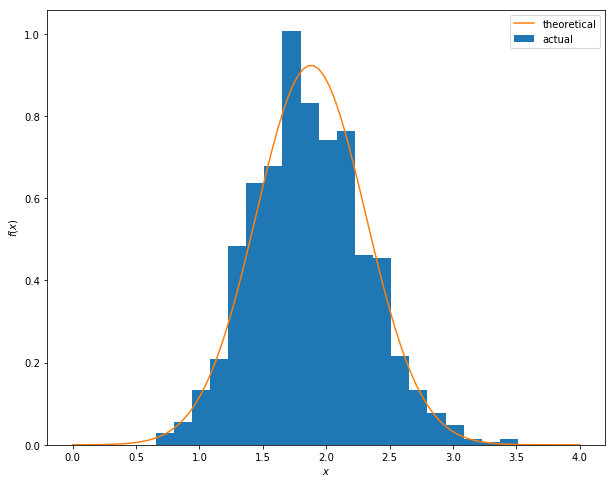

In [6]:
gen_subs(sample, 5)

Размер выборки =  10
Теоретическое и выборочное среднее: 1.880 & 1.877
Теоретическое и выборочное стандартное отклонение: 0.305 & 0.313


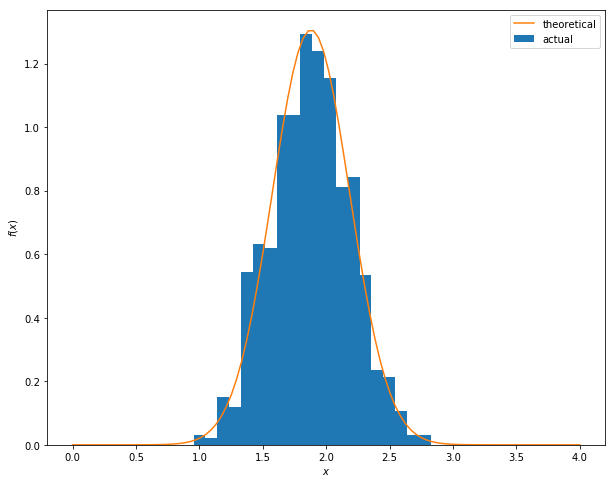

In [7]:
gen_subs(sample, 10)

Размер выборки =  50
Теоретическое и выборочное среднее: 1.880 & 1.884
Теоретическое и выборочное стандартное отклонение: 0.137 & 0.141


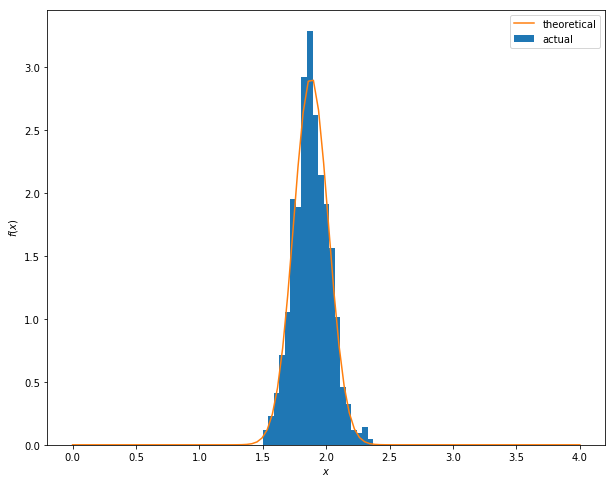

In [8]:
gen_subs(sample, 50)

### Выводы
 * С ростом величины выборки (от 5 к 50) происходит сжатие гистограммы средних к теоретическому среднему (снижается стандартное отклонение)
 * С ростом величины выборки теоретические и выборочные средние, стандартные отклонения практически сравниваются
 * Чем выше значение величины выборки, тем больше гистограмма распределения выборочных средних похожа на нормальное распределение
 * Данными примерами мы подтвердили постулаты Центральной Предельной Теоремы